In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
 # loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv(r'C:\Users\91777\Downloads\gld_price_data.csv')

In [4]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
# print last 5 rows of the dataframe
gold_data.tail()# print last 5 rows of the dataframe


,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [7]:
# getting some basic information about the data
gold_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
# checking the number of missing values
gold_data.isnull()


,Date,SPX,GLD,USO,SLV,EUR/USD
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
2285,False,False,False,False,False,False
2286,False,False,False,False,False,False
2287,False,False,False,False,False,False
2288,False,False,False,False,False,False


In [9]:
# getting the stastical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [10]:
# correlation:
#1. Positive correlation
#2. Negative correlation

correlation = gold_data.corr()


<AxesSubplot:>

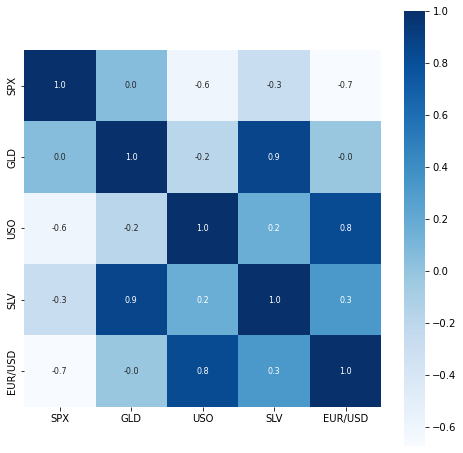

In [11]:
# constructing a heatmap to understand the correlation 
plt.figure(figsize = (8,8))
sns.heatmap(correlation , cbar=True ,square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues' )

In [12]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\91777\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

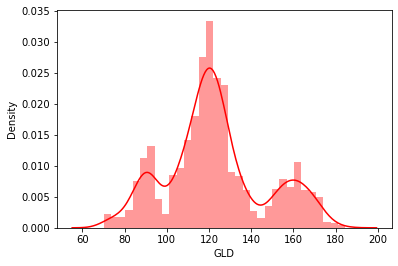

In [13]:
#check the distribution of gold prize
sns.distplot(gold_data['GLD'],color='red')


In [14]:
# splitting the features and target
x = gold_data.drop(['Date','GLD'],axis=1)
y = gold_data['GLD']

In [15]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [16]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [17]:
#splitting into training data and test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2 , random_state=2)


In [18]:
#model training:Random Forest Regressor

regressor = RandomForestRegressor(n_estimators=100)

In [19]:
# training the model
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [20]:
# model evaluation

# prediction of test data
test_data_prediction = regressor.predict(x_test)


In [21]:
print(test_data_prediction)

[168.71749913  81.91969989 115.88410019 127.63420086 120.77340138
 154.59009825 150.41269816 125.95730024 117.54379863 126.01600021
 116.96070113 172.45980103 141.61999865 167.89189891 115.22640009
 117.96210071 137.57160309 170.14830084 159.77410272 155.60619983
 155.19190055 124.8037001  175.9071     156.92170351 125.23710023
  93.89549981  77.57080054 120.74170007 119.12239948 167.4131
  88.22400041 125.32839997  91.04390038 117.73510005 121.18339895
 136.0669001  115.52600099 114.89370084 148.06499981 107.3459009
 104.8206026   87.28429778 126.35350095 117.85799953 152.88279912
 119.70189992 108.5054     107.97659853  93.24140035 126.97879823
  74.60230068 113.51129914 121.3934     111.28229913 118.98749892
 120.19059932 159.34059993 169.736201   146.96149688  85.95999849
  94.41530021  86.93299897  90.66610013 118.94370079 126.38880052
 127.50300001 168.00339921 122.30919921 117.38849898  98.77570049
 168.49270202 142.99979876 131.89630278 121.12190233 120.64539919
 119.75280061 1

In [22]:
# R Square error
error_score = metrics.r2_score(y_test , test_data_prediction)
print("R squared error :" , error_score)

R squared error : 0.9889314085127618


In [23]:
# compare te actual values and predicted values

y_test = list(y_test)

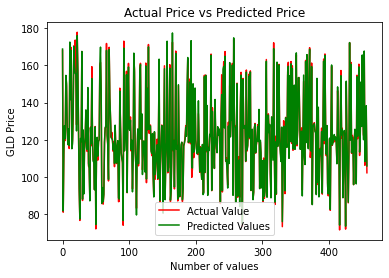

In [24]:
plt.plot(y_test, color='red', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Values')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()